In [51]:
!pip install wordcloud
import pandas as pd
import nltk
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk import word_tokenize
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

In [52]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Pre- Preprocessing

In [4]:
df = pd.read_csv('train.csv')

In [5]:
dummy_neg = df[df['Is_Response'] == 'not happy']
dummy_pos = df[df['Is_Response'] == 'not happy']

In [53]:
def plt_count_freq(counts,title=None,_ylim=100000):
    freq = list(set(counts.values()))
    freq.sort()
    freq.reverse()
    plt.plot(freq)
    plt.xlabel('Terms')
    plt.ylabel('freq count')
    plt.ylim(0,_ylim)
    if(title!=None):
        plt.title(title)
    plt.show()

In [7]:
neg_words = ' '.join(dummy_neg['Description'])
pos_words = ' '.join(dummy_pos['Description'])
neg_words_list = word_tokenize(neg_words)
pos_words_list = word_tokenize(pos_words)
neg_counts = Counter(neg_words_list)
pos_counts = Counter(pos_words_list)
neg_most_common = neg_counts.most_common()
pos_most_common = pos_counts.most_common()

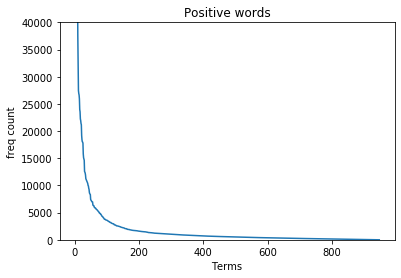

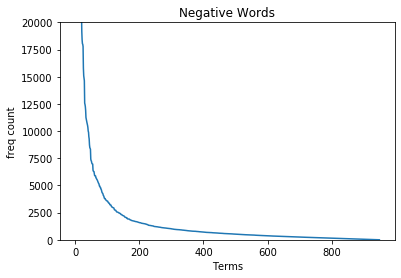

In [8]:
#plt_count_freq(counts,'Corpus')
plt_count_freq(pos_counts,'Positive words',40000)
plt_count_freq(neg_counts,'Negative Words',20000)

In [9]:
def create_tf_high_stoplist(pos_counts,neg_counts,thresh=20000):
    pos_words_thresh = []
    stoplist = []
    for word,freq in pos_counts.most_common():
        if freq>=thresh:
            pos_words_thresh.append(word)
        else:
            break
    for word,freq in neg_counts.most_common():
        if(freq<thresh):
            break
        elif(word in pos_words_thresh):
            stoplist.append(word)
    return stoplist      

In [10]:
tf_high_stoplist = create_tf_high_stoplist(pos_counts,neg_counts,7500)

In [11]:
def clean_data(inputDF, tf1 = False,stops_bool = False,tf_high=False, updates=[],*tf_high_args):

    if tf1:
        file = open("TF1_cleaned_input.p",'rb')
        tf1_cleaned_data = pickle.load(file)
        file.close()
        stops = set()
        if stops_bool:
            stops = set(STOPWORDS)
            if updates:
                assert isinstance(updates,list)
                stops.update(updates)
            if tf_high:
                stops.update(create_tf_high_stoplist(*tf_high_args))
        else:
            if tf_high:
                stops.update(create_tf_high_stoplist(*tf_high_args))
            if updates:
                assert isinstance(updates,list)
                stops.update(updates)
        count_vec = CountVectorizer(analyzer = "word",stop_words= stops,max_features=500)
        count_vec_ngrams = CountVectorizer(analyzer = "word", stop_words = stops , ngram_range = (1,2),max_features=500)
        
    else:
        
        pass
        

In [12]:
df['sentiment']  = df['Is_Response'].apply(
lambda x : 0 if x == 'not happy' else 1)

In [13]:
df['sentiment'].value_counts()

1    26521
0    12411
Name: sentiment, dtype: int64

In [14]:
inputDF = df['Description']
outputDF = df['sentiment']

In [15]:
file = open("TF1_cleaned_input.p",'rb')
tf1_cleaned_data = pickle.load(file)
file.close()

In [16]:
len(tf1_cleaned_data)

38932

In [17]:
inputDF = tf1_cleaned_data

In [18]:
words = ' '.join(inputDF)

In [19]:
x_train,x_test,y_train,y_test = train_test_split(inputDF,outputDF,random_state=42)

In [20]:
stops = set(STOPWORDS)
stops.update(tf_high_stoplist)

In [21]:
count_vec = CountVectorizer(analyzer = "word",stop_words=stops)
count_vec_ngrams = CountVectorizer(analyzer = "word", ngram_range = (1,2),stop_words=stops)

In [22]:
train_features = count_vec.fit_transform(x_train)
train_features_grams = count_vec_ngrams.fit_transform(x_train)

C:\Users\subhg\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\subhg\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [23]:
test_features = count_vec.transform(x_test)
test_features_grams = count_vec_ngrams.transform(x_test)

# GradientBoostingRegression

In [24]:
clf = GradientBoostingRegressor(n_estimators=100,max_depth=10,learning_rate=0.01,verbose=2)

In [25]:
clf.fit(train_features,y_train)

      Iter       Train Loss   Remaining Time 
         1           0.2158            6.91m
         2           0.2143            6.62m
         3           0.2129            6.71m
         4           0.2116            6.60m
         5           0.2102            6.53m
         6           0.2089            6.51m
         7           0.2076            6.45m
         8           0.2063            6.37m
         9           0.2050            6.30m
        10           0.2038            6.23m
        11           0.2026            6.18m
        12           0.2014            6.12m
        13           0.2002            6.06m
        14           0.1991            6.00m
        15           0.1979            5.94m
        16           0.1968            5.88m
        17           0.1957            5.81m
        18           0.1946            5.74m
        19           0.1935            5.66m
        20           0.1925            5.59m
        21           0.1915            5.52m
        2

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=2, warm_start=False)

In [26]:
clf.score(test_features,y_test)

0.25238773255200864

In [27]:
clf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 8.72682453e-06, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

# Random Forest

In [28]:
clf = RandomForestClassifier(random_state=42)
clf_grams = RandomForestClassifier(random_state=42)

In [29]:
clf.fit(train_features,y_train)

C:\Users\subhg\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [30]:
clf.score(test_features,y_test)

0.8071509298263639

In [31]:
clf_grams.fit(train_features_grams,y_train)

C:\Users\subhg\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [32]:
clf_grams.score(test_features_grams,y_test)

0.7908147539299291

## Decision Tree

In [33]:
clf = DecisionTreeClassifier()
clf_grams = DecisionTreeClassifier()
clf.fit(train_features,y_train)
clf_grams.fit(train_features_grams,y_train)
print(clf_grams.score(test_features_grams,y_test))
print(clf.score(test_features,y_test))

0.7590670913387445
0.745710469536628


## MultinomialNB

In [34]:
clf = MultinomialNB()
clf_grams = MultinomialNB()
clf_grams.fit(train_features_grams,y_train)
clf.fit(train_features,y_train)
print(clf_grams.score(test_features_grams,y_test))
clf.score(test_features,y_test)

0.8526661871981918


0.8652008630432549

In [35]:
TF = TfidfVectorizer()
train_features = TF.fit_transform(x_train)
test_features = TF.transform(x_test)

In [36]:
clf = DecisionTreeClassifier()
clf.fit(train_features,y_train)
clf.score(test_features,y_test)

0.7458132127812597

In [37]:
clf = MultinomialNB()
clf.fit(train_features,y_train)
clf.score(test_features,y_test)

0.828624267954382

In [38]:
list_words = word_tokenize(words)

In [39]:
counts = Counter(list_words)

In [40]:
tf_high_stoplist = []

## Random Forest

In [41]:
train_features = count_vec.fit_transform(inputDF)

In [42]:
train_features.shape

(38932, 24075)

In [43]:
testDF = pd.read_csv('test.csv')
testing_df = testDF['Description']

In [44]:
test_features = count_vec.transform(testing_df)

In [45]:
y_train = df['sentiment']

In [46]:
clf = RandomForestClassifier()
clf.fit(train_features,y_train)

C:\Users\subhg\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
prediction = clf.predict(test_features)

In [48]:
prediction.shape

(29404,)

In [50]:
testDF['Is_Response'] = prediction
testDF['Is_Response'] = testDF['Is_Response'].apply(lambda x:'not_happy' if x==0 else 'happy') 
submissionDF = testDF[['User_ID','Is_Response']]
submissionDF.to_csv('submission.csv',columns=['User_ID','Is_Response'],index=False)